In [9]:
import os
import pandas as pd
import numpy as np
import gossipcat as gc
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
wd = '/Users/ewenwang/Documents/practice_data'
os.chdir(wd)
dataFile = 'credit_score.csv'
dataset = pd.read_csv(dataFile, low_memory=False)

In [4]:
help(gc.glimpse)

Help on function glimpse in module gossipcat.core:

glimpse(data, target, predictors)
    A glimpse at the dataset.
    
    Prints a general infomation of the dataset and plot the distribution 
    of target value.
    
    Args:
        data: A dataset you wanna glimpse.
        target: The target variable in your dataset; limited to binary.
        predictors: The predictors of your dataset.



In [5]:
dataset.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
target = 'SeriousDlqin2yrs'
predictors = [x for x in dataset.columns[1:] if x not in [target]]

In [7]:
# gc.glimpse(dataset, target)

In [8]:
dataset[predictors].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


In [12]:
pp.ProfileReport(dataset)

Number of variables,12
Number of observations,150000
Total Missing (%),1.9%
Total size in memory,13.7 MiB
Average record size in memory,96.0 B
Numeric,10
Categorical,0
Date,0
Text (Unique),0
Rejected,2
Distinct count,114194


In [13]:
help(gc.features_dup)

Help on function features_dup in module gossipcat.core:

features_dup(data, n_head=5000, print_dup=False)
    Obtain duplicated features.
    
    Checks first n_head rows and obtains duplicated features.
    
    Args:
        data: A dataset you wanna check and return duplicated columns names.
        n_head: First n_head rows to be checked; default 5000.
        print_dup: Whether print duplicated columns names; default with False.
    
    Returns:
        A list of the names of duplicatec columns.



In [11]:
# dup = gc.features_dup(dataset, print_dup=True)

In [14]:
help(gc.features_clf)

Help on function features_clf in module gossipcat.core:

features_clf(data, features)
    Feature classification.
    
    Divides features into sublists according to their data type.
    
    Args:
        data: A dataset which you wanna classify features into subsets 
            according to the data type.
        features: A list of column names.
    
    Returns:
        int_features: A list of column names of int features.
        float_features: A list of column names of float features.
        object_features: A list of column names of object features.



In [15]:
i, f, o = gc.features_clf(dataset, predictors)

In [16]:
i

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [17]:
f

['RevolvingUtilizationOfUnsecuredLines',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfDependents']

In [18]:
o

[]

In [19]:
help(gc.corr_pairs)

Help on function corr_pairs in module gossipcat.core:

corr_pairs(data, gamma=0.9)
    Detect corralted features.
    
    Computes correlated feature pairs with correlated coefficient larger than gamma.
    
    Args:
        data: A dataset which you wanna detect corralted features from.
        gamma: The correlated coefficiency; default at 0.9.
    
    Returns:
        pairs: A list of correlated features.



In [20]:
i_c = gc.corr_pairs(dataset[i], gamma = 0.9)
i_c

[('NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'),
 ('NumberOfTime30-59DaysPastDueNotWorse',
  'NumberOfTime60-89DaysPastDueNotWorse'),
 ('NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate')]

In [21]:
f_c = gc.corr_pairs(dataset[f], gamma = 0.75)
f_c

[]

In [22]:
help(gc.features_new)

Help on function features_new in module gossipcat.core:

features_new(data, corr_list, target, auc_score=0.75, silent=False)
    Build new features from correlated features.
    
    Builds new features based on correlated feature pairs if the new feature 
    has an auc greater than auc_score.
    
    Args:
        data: A dataset which you wanna generate new features from.
        corr_list: The correlated list to generate new features from.
        target: The target variable in your dataset; limited to binary.
        auc_score: The auc to decide whether generate features, default at 0.75.
        silent: Whether print the new features' names out; default with False.
    
    Returns:
        new: A dataset conatianing new features.



In [23]:
new_features = gc.features_new(dataset, i_c, target, silent=True)

In [24]:
new_features.head()

""


In [10]:
seed = 2017
dtrain, dtest = train_test_split(dataset, test_size=0.33, random_state=seed)

In [26]:
help(gc.simAnneal)

Help on function simAnneal in module gossipcat.core:

simAnneal(train, predictors, target, param={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}, results=True)
    Hyper parameter tuning with simulated annealing.
    
    Employes the simulated annealing to find the optimal hyper parameters and 
    return an optimized classifier.
    
    Args:
        train: A training set of your machine learning project.
        predictors: The predictors of your dataset.
        target: The target variable in your dataset; limited to binary.
        param: A hyper parameter dictionary for tuning task; default with param_1.
        results: Whether print the progress out; default with True.
    
    Returns:
        optimized_clf: An optimized classifier after hyper parameter tuning.



In [27]:
param_1 = {
    'max_depth': [i for i in range(1, 10, 1)],
    'subsample': [i / 10.0 for i in range(1, 10, 1)],
    'colsample_bytree': [i / 10.0 for i in range(1, 10, 1)],
}

In [11]:
clf_1 = gc.simAnneal(dtrain, predictors, target)


simulating...

INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 38.4min finished


2 T: 10.00000, score: 0.846721, std: 0.003846, params: {'max_depth': 8, 'subsample': 0.40000000000000002, 'colsample_bytree': 0.80000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 12.2min finished


3 T: 10.00000, score: 0.861128, std: 0.003653, params: {'max_depth': 3, 'subsample': 0.40000000000000002, 'colsample_bytree': 0.80000000000000004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 36.0min finished


4 T: 10.00000, score: 0.859402, std: 0.004005, params: {'max_depth': 3, 'subsample': 0.40000000000000002, 'colsample_bytree': 0.10000000000000001}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.2min finished


5 T: 10.00000, score: 0.854775, std: 0.004445, params: {'max_depth': 5, 'subsample': 0.40000000000000002, 'colsample_bytree': 0.10000000000000001}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished


6 T: 10.00000, score: 0.854964, std: 0.004277, params: {'max_depth': 5, 'subsample': 0.59999999999999998, 'colsample_bytree': 0.10000000000000001}

 best score:  0.86112826335 
 best parameters:  {'max_depth': 3, 'subsample': 0.40000000000000002, 'colsample_bytree': 0.80000000000000004}


In [36]:
help(gc.report)

Help on function report in module gossipcat.core:

report(clf, Train, Test, predictors, target)
    This function prints model report with a classifier on test dataset.



In [12]:
gc.report(clf_1, dtrain, dtest, predictors, target)


predicting...

Model Report
Accuracy : 0.812159
AUC Score (train): 0.890331
AUC Score (test): 0.864384
             precision    recall  f1-score   support

          0       0.98      0.81      0.89     46163
          1       0.23      0.76      0.35      3337

avg / total       0.93      0.81      0.85     49500



In [42]:
param_2 = {
    'max_depth': [i for i in [1, 2, 3]],
    'subsample': [i / 100.0 for i in range(15, 25, 1)],
    'colsample_bytree': [i / 100.0 for i in range(55, 65, 1)],
}
clf_2 = gc.simAnneal(dtrain, predictors, target, param_2)
gc.report(clf_2, dtrain, dtest, predictors, target)


simulating...

INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   34.3s finished


2 T: 10.00000, score: 0.861, std: 0.004, params: {'max_depth': 1, 'subsample': 0.20000000000000001, 'colsample_bytree': 0.62}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.4s finished


3 T: 10.00000, score: 0.863, std: 0.003, params: {'max_depth': 2, 'subsample': 0.20000000000000001, 'colsample_bytree': 0.62}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.0s finished


4 T: 10.00000, score: 0.863, std: 0.003, params: {'max_depth': 2, 'subsample': 0.20000000000000001, 'colsample_bytree': 0.58999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.5s finished


5 T: 10.00000, score: 0.861, std: 0.004, params: {'max_depth': 3, 'subsample': 0.20000000000000001, 'colsample_bytree': 0.58999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished


6 T: 10.00000, score: 0.861, std: 0.003, params: {'max_depth': 3, 'subsample': 0.23999999999999999, 'colsample_bytree': 0.58999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


7 T: 7.50000, score: 0.861, std: 0.003, params: {'max_depth': 3, 'subsample': 0.23999999999999999, 'colsample_bytree': 0.56000000000000005}
8 T: 7.50000, score: 0.861, std: 0.003, params: {'max_depth': 3, 'subsample': 0.23999999999999999, 'colsample_bytree': 0.58999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished


9 T: 7.50000, score: 0.861, std: 0.003, params: {'max_depth': 3, 'subsample': 0.17000000000000001, 'colsample_bytree': 0.58999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.4s finished


10 T: 7.50000, score: 0.861, std: 0.004, params: {'max_depth': 3, 'subsample': 0.16, 'colsample_bytree': 0.58999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.8s finished


11 T: 7.50000, score: 0.861, std: 0.003, params: {'max_depth': 1, 'subsample': 0.16, 'colsample_bytree': 0.58999999999999997}

 best score:  0.863000650038 
 best parameters:  {'max_depth': 2, 'subsample': 0.20000000000000001, 'colsample_bytree': 0.62}

predicting...

Model Report
Accuracy : 0.805005
AUC Score (Train): 0.875291
AUC Score (Test): 0.866225
             precision    recall  f1-score   support

          0       0.98      0.81      0.88     46163
          1       0.22      0.77      0.35      3337

avg / total       0.93      0.80      0.85     49500



In [43]:
param_3 = {
    'boosting_type': ['gbdt', 'dart'],
    'max_depth': [i for i in [1, 2]],
    'subsample': [i / 10.0 for i in range(1, 10, 1)],
    'colsample_bytree': [i / 10.0 for i in range(1, 10, 1)],
}
clf_3 = gc.simAnneal(dtrain, predictors, target, param_3)
gc.report(clf_3, dtrain, dtest, predictors, target)


simulating...

INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.8s finished


2 T: 10.00000, score: 0.864, std: 0.004, params: {'boosting_type': 'gbdt', 'max_depth': 2, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.5}
3 T: 10.00000, score: 0.862, std: 0.003, params: {'boosting_type': 'dart', 'max_depth': 2, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.5}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 37.2min finished


4 T: 10.00000, score: 0.862, std: 0.003, params: {'boosting_type': 'dart', 'max_depth': 2, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.90000000000000002}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.0s finished


5 T: 10.00000, score: 0.863, std: 0.004, params: {'boosting_type': 'gbdt', 'max_depth': 2, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.90000000000000002}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.3s finished


6 T: 10.00000, score: 0.863, std: 0.004, params: {'boosting_type': 'gbdt', 'max_depth': 2, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.80000000000000004}

 best score:  0.863546483094 
 best parameters:  {'boosting_type': 'gbdt', 'max_depth': 2, 'subsample': 0.90000000000000002, 'colsample_bytree': 0.5}

predicting...

Model Report
Accuracy : 0.806030
AUC Score (Train): 0.874999
AUC Score (Test): 0.866582
             precision    recall  f1-score   support

          0       0.98      0.81      0.88     46163
          1       0.22      0.77      0.35      3337

avg / total       0.93      0.80      0.85     49500



In [44]:
param_4 = {
    'max_depth': [i for i in [1, 2]],
    'subsample': [i / 100.0 for i in range(85, 95, 1)],
    'colsample_bytree': [i / 100.0 for i in range(45, 55, 1)],
}
clf_4 = gc.simAnneal(dtrain, predictors, target, param_4)
gc.report(clf_4, dtrain, dtest, predictors, target)


simulating...

INFO: Number of possible iterations given cooling schedule: 160



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.3s finished


2 T: 10.00000, score: 0.862, std: 0.003, params: {'max_depth': 1, 'subsample': 0.93999999999999995, 'colsample_bytree': 0.47999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.3s finished


3 T: 10.00000, score: 0.861, std: 0.003, params: {'max_depth': 1, 'subsample': 0.84999999999999998, 'colsample_bytree': 0.47999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.4s finished


4 T: 10.00000, score: 0.864, std: 0.004, params: {'max_depth': 2, 'subsample': 0.84999999999999998, 'colsample_bytree': 0.47999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.7s finished


5 T: 10.00000, score: 0.864, std: 0.004, params: {'max_depth': 2, 'subsample': 0.88, 'colsample_bytree': 0.47999999999999998}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.6s finished


6 T: 10.00000, score: 0.864, std: 0.004, params: {'max_depth': 2, 'subsample': 0.88, 'colsample_bytree': 0.48999999999999999}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   39.8s finished


7 T: 7.50000, score: 0.864, std: 0.004, params: {'max_depth': 2, 'subsample': 0.88, 'colsample_bytree': 0.46999999999999997}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.7s finished


8 T: 7.50000, score: 0.864, std: 0.004, params: {'max_depth': 2, 'subsample': 0.88, 'colsample_bytree': 0.5}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.5s finished


9 T: 7.50000, score: 0.861, std: 0.004, params: {'max_depth': 1, 'subsample': 0.88, 'colsample_bytree': 0.5}
10 T: 7.50000, score: 0.864, std: 0.004, params: {'max_depth': 2, 'subsample': 0.88, 'colsample_bytree': 0.5}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.6s finished


11 T: 7.50000, score: 0.864, std: 0.004, params: {'max_depth': 2, 'subsample': 0.88, 'colsample_bytree': 0.53000000000000003}

 best score:  0.863601413854 
 best parameters:  {'max_depth': 2, 'subsample': 0.84999999999999998, 'colsample_bytree': 0.47999999999999998}

predicting...

Model Report
Accuracy : 0.806308
AUC Score (Train): 0.874539
AUC Score (Test): 0.866509
             precision    recall  f1-score   support

          0       0.98      0.81      0.88     46163
          1       0.22      0.77      0.35      3337

avg / total       0.93      0.80      0.85     49500



In [51]:
help(gc.report_CM)

Help on function report_CM in module gossipcat.core:

report_CM(clf, Test, predictors, target)
    This function prints the recall rate of the classifier on test data and 
    plots out confusion matrix.



In [65]:
import gossipcat as gc

In [2]:
from gossipcat.Report import Report

In [3]:
help(Report)

Help on class Report in module gossipcat.Report:

class Report(builtins.object)
 |  Methods defined here:
 |  
 |  CM(self)
 |      A report on confusion matrix.
 |      
 |      Reports the recall rate of the classifier on test data and plots out 
 |      confusion matrix.
 |  
 |  GN(self)
 |      A general report.
 |      
 |      Prints model report with a classifier on training and test dataset.
 |  
 |  PR(self)
 |      A report on precision-recall curve.
 |      
 |      Reports precision-recall curve and gives average precision.
 |  
 |  __int__(self, classifier, trian, test, predictors, target)
 |      Args:
 |          classifier: A classifier to report.
 |          trian: A training set of your machine learning project.
 |          test: A test set of your machine learning project.
 |          predictors: The predictors of your dataset.
 |          target: The target variable in your dataset; limited to binary.
 |  
 |  -------------------------------------------------------


predicting...

Model Report
Recall metric in the testing dataset:  0.768654480072


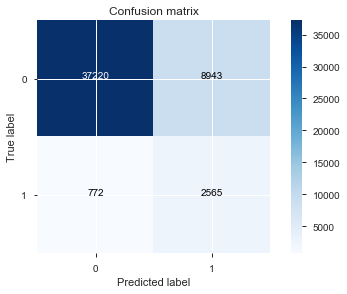

In [66]:
gc.report_CM(clf_3, dtest, predictors, target)


predicting...

Model Report
Average Precision: 0.3859


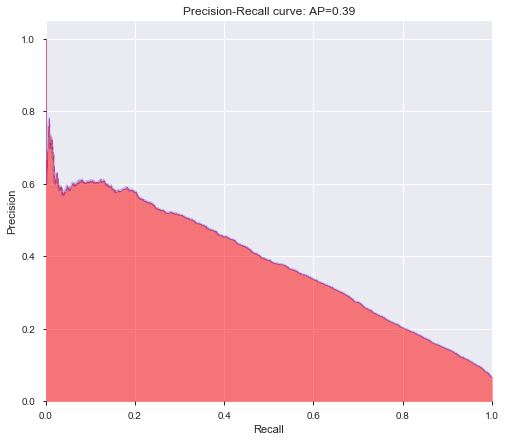

In [64]:
gc.report_PR(clf_3, dtest, predictors, target)